In [25]:
dpi = 300
image_save_dpi = 300

import matplotlib_inline

%matplotlib inline
%matplotlib inline

import matplotlib.pyplot as plt

matplotlib_inline.backend_inline.set_matplotlib_formats('retina')
%config InlineBackend.figure_formats = ['retina'] 

import seaborn as sns
import matplotlib

sns.set(rc={"figure.dpi":dpi, 'savefig.dpi':dpi})
sns.set_context('notebook')
sns.set_style("ticks")
matplotlib.rcParams["figure.dpi"] = dpi
plt.rcParams['figure.dpi'] = dpi



# Preparing Data

In [26]:
import pandas as pd
import numpy as np
import statistics as sts

# Pre-Processing

## Volcano List

In [27]:
data = pd.read_excel('Data/Data_Volcano_Eruption.xlsx',skiprows=[0])
data = data[(data['Start Year'] >= 1800)] 
data['Volcano Name'].unique()

listGA = ['Arjuno-Welirang', 'Ciremai', 'Dieng Volcanic Complex',
       'Galunggung', 'Gede-Pangrango', 'Guntur', 'Ijen', 'Kelud',
       'Lamongan', 'Lawu', 'Merapi', 'Papandayan', 'Perbakti-Gagak',
       'Raung', 'Salak', 'Semeru', 'Slamet', 'Sundoro',
       'Tangkuban Parahu', 'Tengger Caldera']
lokgajawa = pd.read_excel('Data/GVP_Volc_List.xlsx',skiprows=[0])
lokgajawa = lokgajawa[lokgajawa['Volcano Name'].isin(listGA)]
lokgajawa1 = lokgajawa[['Volcano Name', 'Latitude', 'Longitude']].dropna()
lokgajawa1

,Volcano Name,Latitude,Longitude
37,Arjuno-Welirang,-7.733,112.575
159,Ciremai,-6.895,108.408
182,Dieng Volcanic Complex,-7.200,109.879
229,Galunggung,-7.250,108.058
242,Gede-Pangrango,-6.786,106.983
271,Guntur,-7.143,107.841
296,Ijen,-8.058,114.242
371,Kelud,-7.935,112.314
434,Lamongan,-7.981,113.341
441,Lawu,-7.625,111.192


## VEI

Text(0.5, 0, 'Number of eruptions (n)')

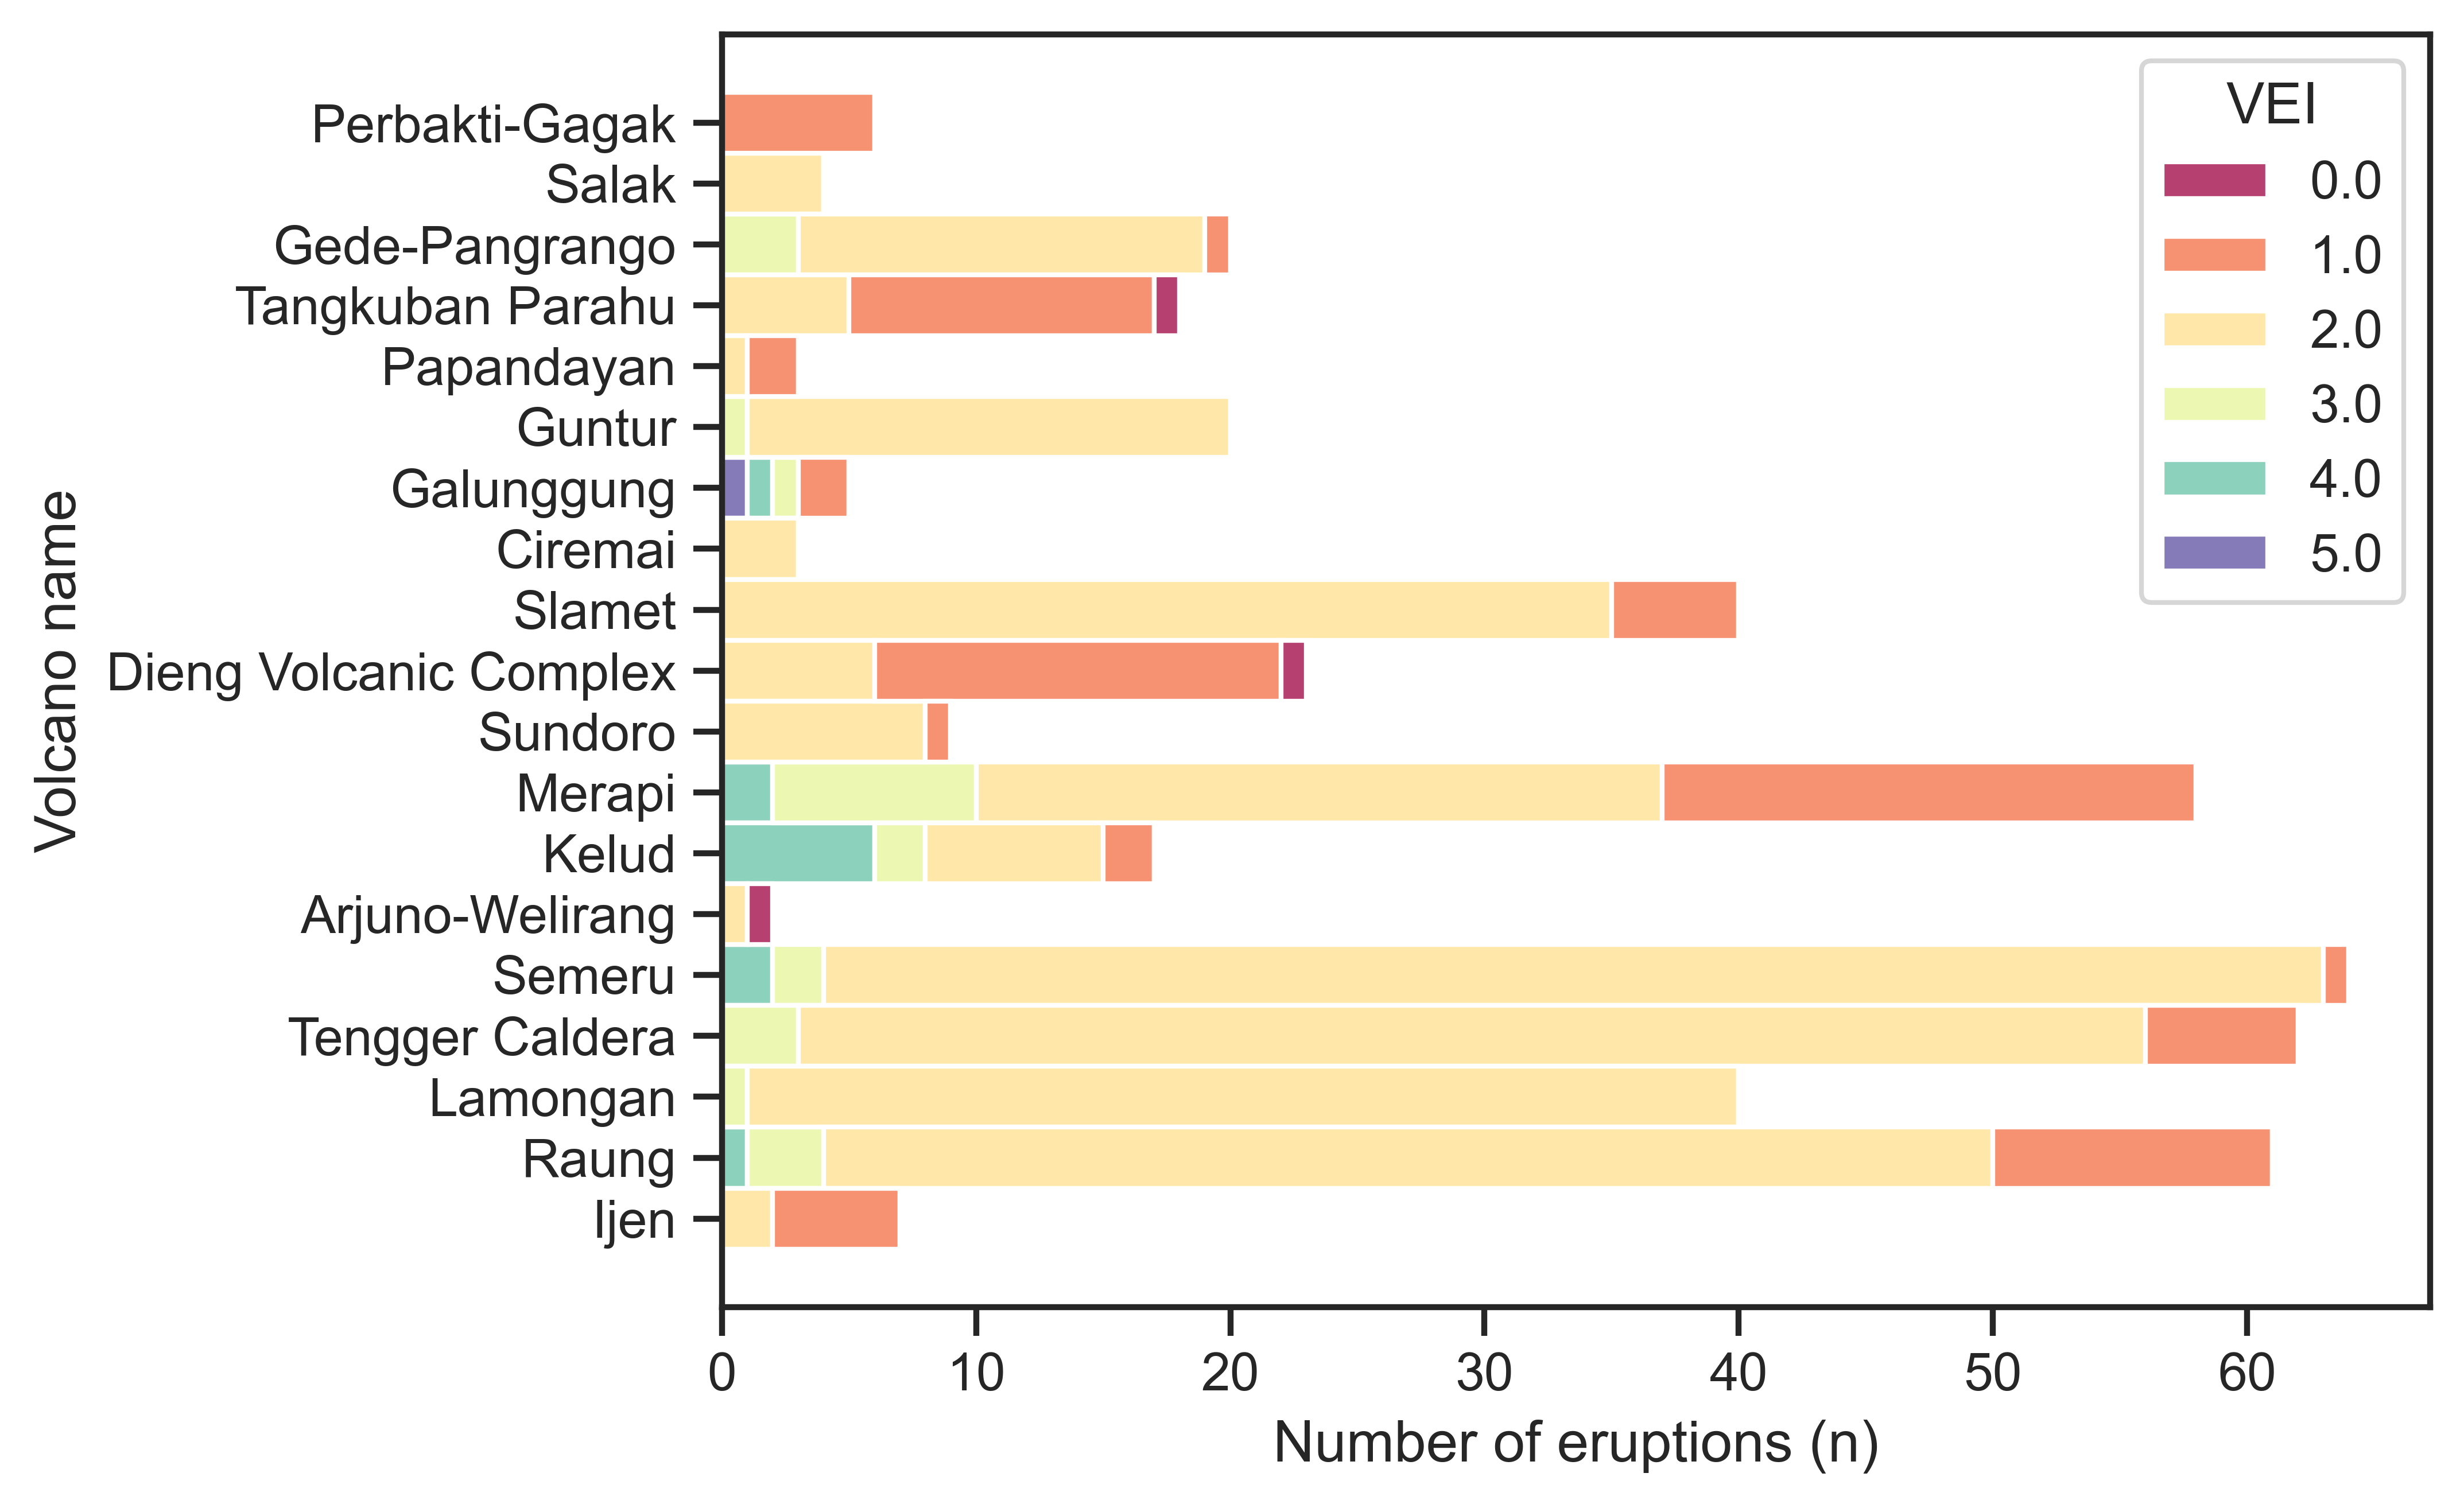

In [28]:
vei = data.groupby(['Volcano Name', 'VEI']).size().unstack(fill_value=0)
veimedian = data.groupby('Volcano Name')['VEI'].median()
veimedian.head()

veimode = data.groupby('Volcano Name')['VEI'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
veimode



order=[
    "Perbakti-Gagak",
    "Salak",
    "Gede-Pangrango",
    "Tangkuban Parahu",
    "Papandayan",
    "Guntur",
    "Galunggung",
    "Ciremai",
    "Slamet",
    "Dieng Volcanic Complex",
    "Sundoro",
    "Merapi",
    "Kelud",
    "Arjuno-Welirang",
    "Semeru",
    "Tengger Caldera",
    "Lamongan",
    "Raung",
    "Ijen"
]

data['Volcano Name'] = pd.Categorical(data['Volcano Name'], categories=order, ordered=True)

sns.histplot(data=data, y='Volcano Name', hue='VEI',palette='Spectral', multiple='stack')
plt.ylabel('Volcano name')
plt.xlabel('Number of eruptions (n)')

## Repose time in month

Text(0, 0.5, 'Volcano name')

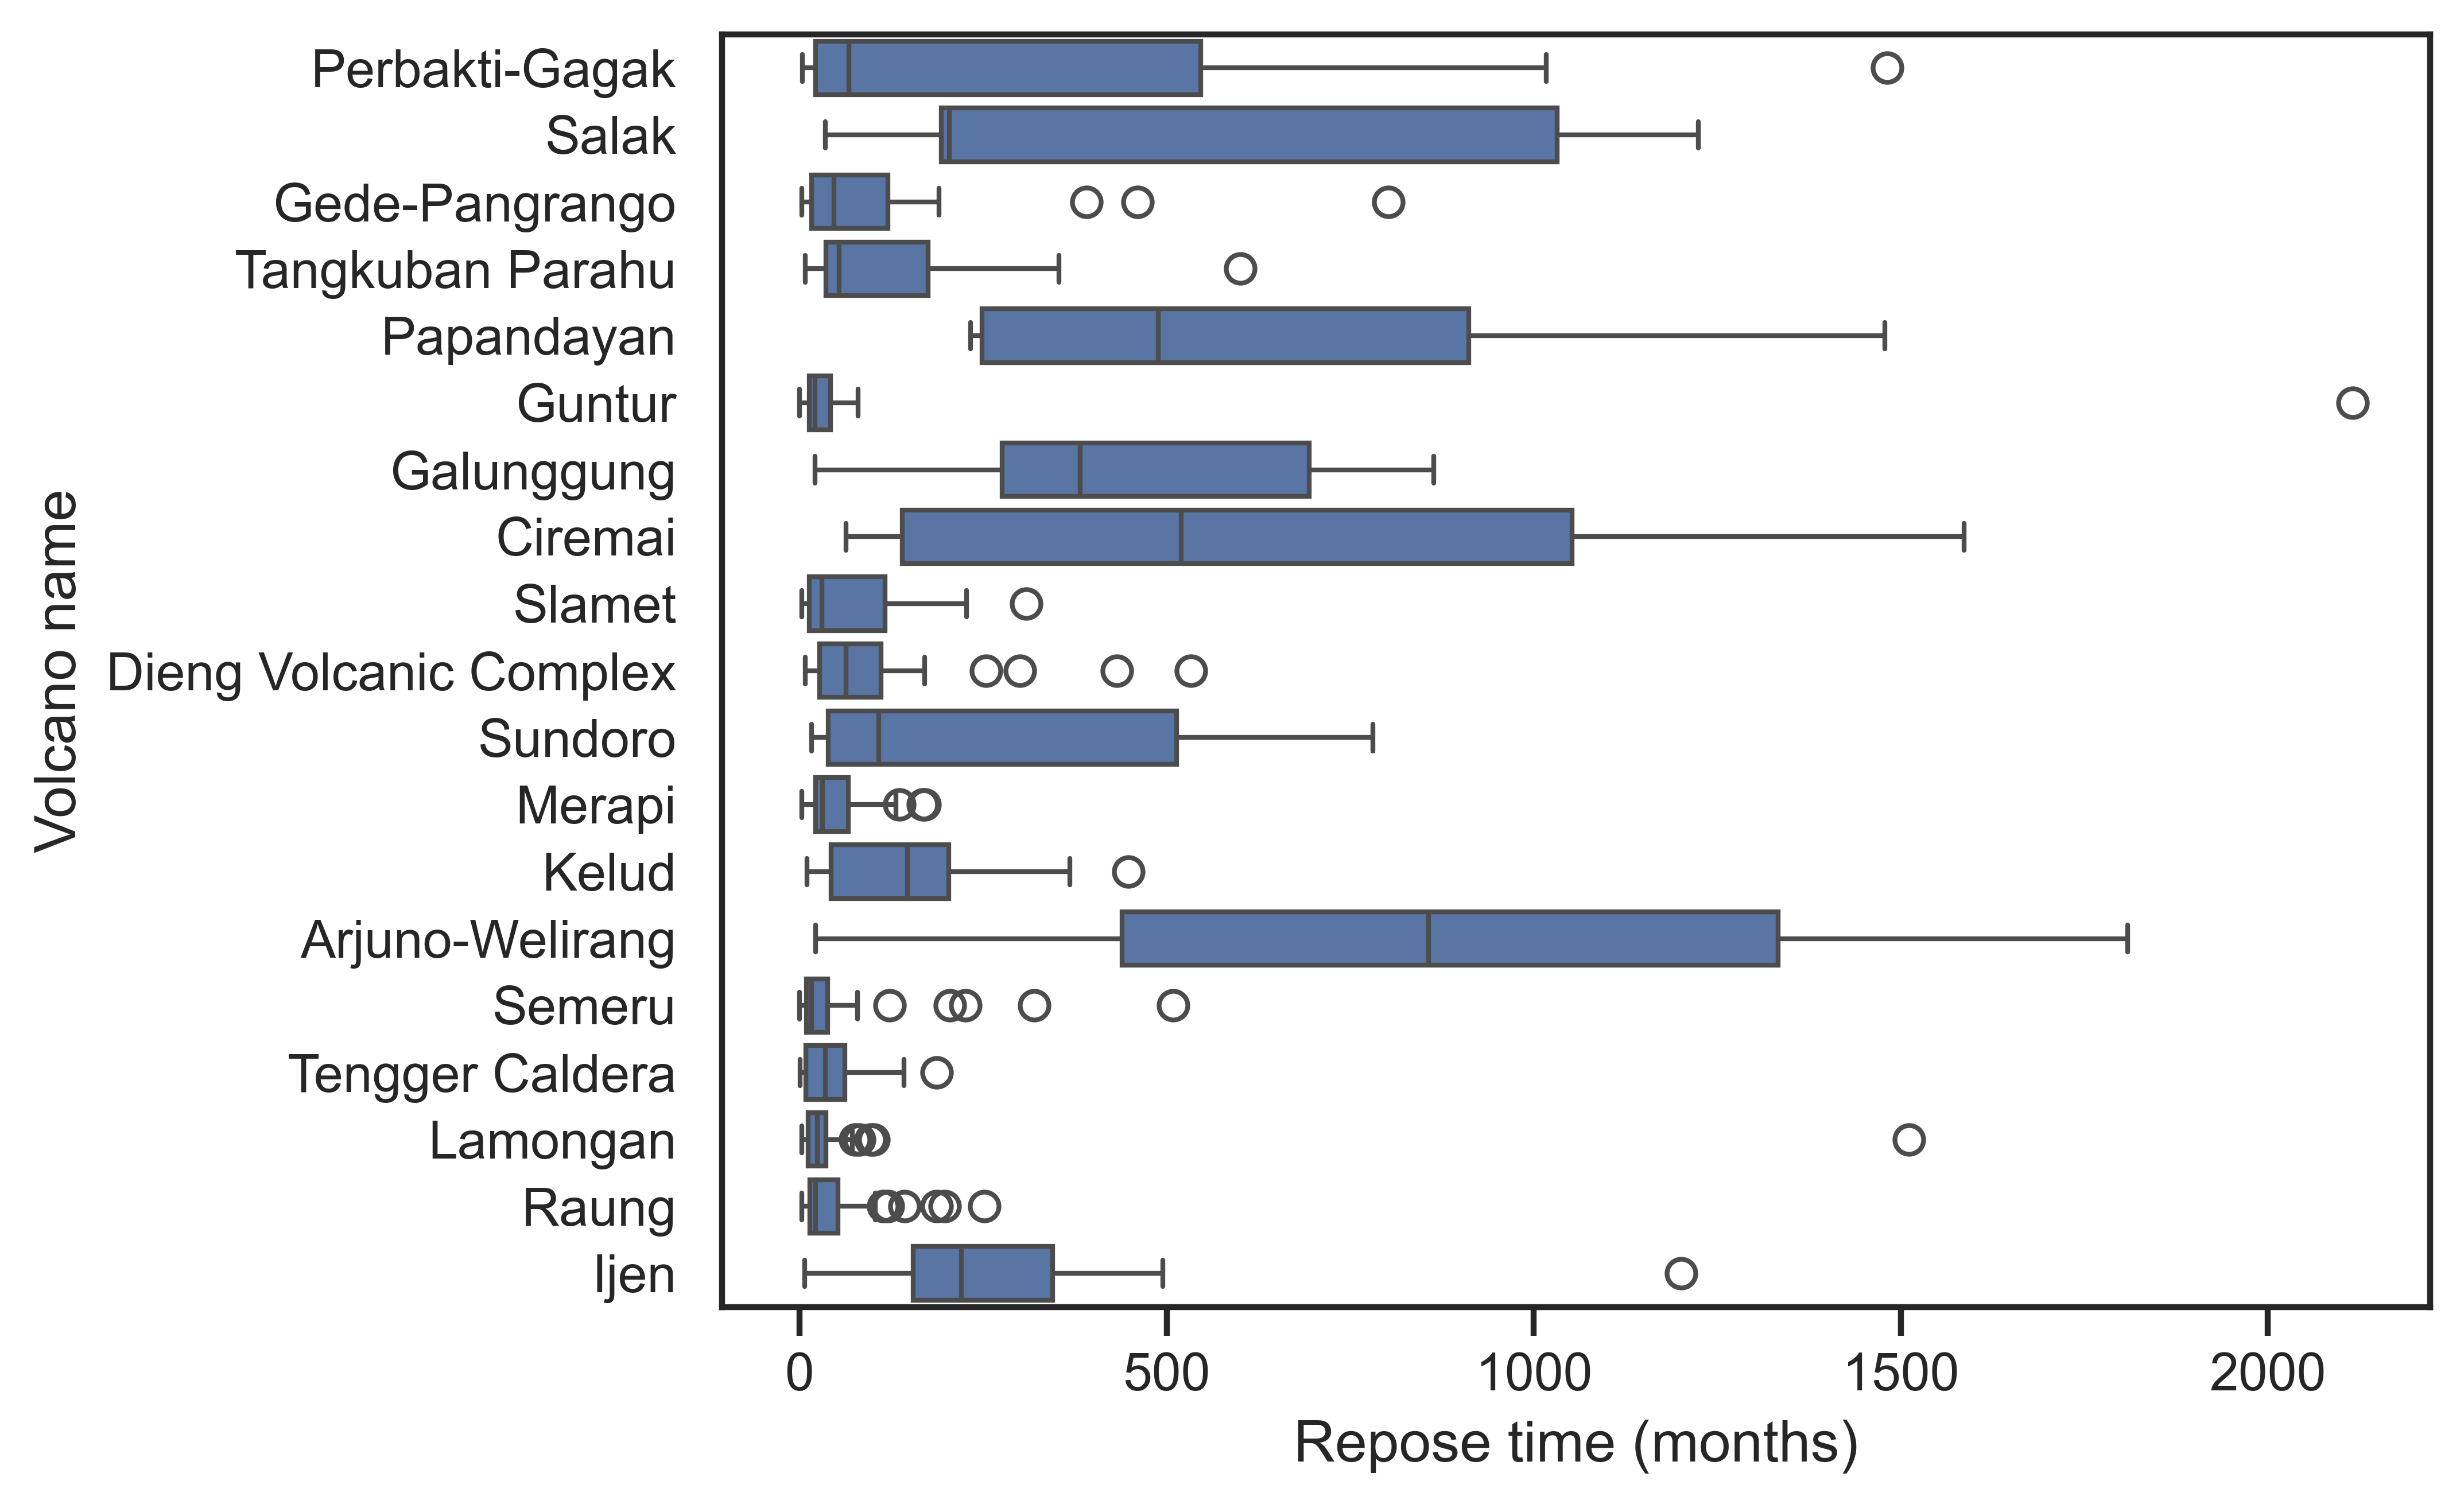

In [29]:
datarepose = pd.read_excel('Data/Data_Volcano_Repose.xlsx',skiprows=[0])
datarepose = datarepose[(datarepose['Start Year'] >= 1800)] 
datarepose['Start Month'] = datarepose['Start Month'].replace(0,1).fillna(1)
datarepose['Date'] = datarepose['Start Year'].astype(str)+'/'+datarepose['Start Month'].astype(str)
datarepose['Date'] = datarepose['Date'].str.replace('.0','')
datarepose['Date'] = pd.to_datetime(datarepose['Date'], format='%Y/%m')
datarepose = datarepose.sort_values(by=['Volcano Name', 'Date'], ascending=True)
datarepose['Date_Month'] = datarepose['Date'].dt.to_period('M')
datarepose['Repose'] = datarepose.groupby('Volcano Name')['Date_Month'].diff().dropna().apply(lambda x: x.n)
reposedesc = datarepose.groupby('Volcano Name')['Repose'].describe()
reposemedian = datarepose.groupby('Volcano Name')['Repose'].median()
reposemean = datarepose.groupby('Volcano Name')['Repose'].mean()

order=[
    "Perbakti-Gagak",
    "Salak",
    "Gede-Pangrango",
    "Tangkuban Parahu",
    "Papandayan",
    "Guntur",
    "Galunggung",
    "Ciremai",
    "Slamet",
    "Dieng Volcanic Complex",
    "Sundoro",
    "Merapi",
    "Kelud",
    "Arjuno-Welirang",
    "Semeru",
    "Tengger Caldera",
    "Lamongan",
    "Raung",
    "Ijen"
]

import seaborn as sns
sns.boxplot(data=datarepose, x='Repose',y='Volcano Name',order=order)
plt.xlabel('Repose time (months)')
plt.tick_params(axis='y', which='both', left=False, right=False)
plt.ylabel ('Volcano name')

## Volcanic events

In [30]:
eventsum = data.groupby('Volcano Name')[[
    'Episode',
    'Explosion',
    'Phreatic activity',
    'Ash',
    'Lapilli',
    'Scoria',
    'Blocks',
    'Bombs',
    'Tephra',
    'Pumice',
    'Thermal anomaly',
    'Ash plume', 
    'Ashfall',
    'Eruption cloud',
    'Avalanche',
    'Incandescent ejecta',
    'Incandescent',
    'Lava spine',
    'Lava dome',
    'Lava flow',
    'Pyroclastic flow',
    'Lahar',
    'Collapse',
    'Earthquake (undefined)',
    'Seismicity (volcanic)',
    'Seismicity (tremor)',
    'Flames',
    'Crater',
    'Volcanic "smoke"',
    'Deformation (inflation)',
    'Degassing',
    'Lightning',
    'Audible Sounds']].sum()
eruptionsum = data['Volcano Name'].value_counts()

C:\Users\geika\AppData\Local\Temp\ipykernel_5380\2388893949.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  eventsum = data.groupby('Volcano Name')[[


## Merging data

In [31]:
from functools import reduce
dfs = [eventsum, eruptionsum, reposemean, veimedian, lokgajawa1]
newdata = reduce(lambda left, right: pd.merge(left, right, on='Volcano Name'), dfs)
newdata = newdata.rename(columns={'count':'Eruption number'})
newdata

,Volcano Name,Episode,Explosion,Phreatic activity,Ash,Lapilli,Scoria,Blocks,Bombs,Tephra,...,"Volcanic ""smoke""",Deformation (inflation),Degassing,Lightning,Audible Sounds,Eruption number,Repose,VEI,Latitude,Longitude
0,Perbakti-Gagak,6,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,6,384.000000,1.0,-6.750,106.675
1,Salak,4,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4,537.600000,2.0,-6.716,106.733
2,Gede-Pangrango,20,18.0,1.0,12.0,1.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,1.0,3.0,20,128.000000,2.0,-6.786,106.983
3,Tangkuban Parahu,19,3.0,17.0,7.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,19,134.400000,1.0,-6.770,107.600
4,Papandayan,3,2.0,3.0,2.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3,672.000000,1.0,-7.320,107.730
5,Guntur,21,20.0,0.0,9.0,1.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,21,122.181818,2.0,-7.143,107.841
6,Galunggung,5,4.0,1.0,4.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,5,448.000000,3.0,-7.250,108.058
7,Ciremai,3,2.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,3,672.000000,2.0,-6.895,108.408
8,Slamet,41,42.0,0.0,32.0,2.0,1.0,3.0,2.0,0.0,...,0.0,2.0,1.0,0.0,9.0,41,64.000000,2.0,-7.242,109.208
9,Dieng Volcanic Complex,23,5.0,23.0,6.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,2.0,23,112.000000,1.0,-7.200,109.879


## Filtering data

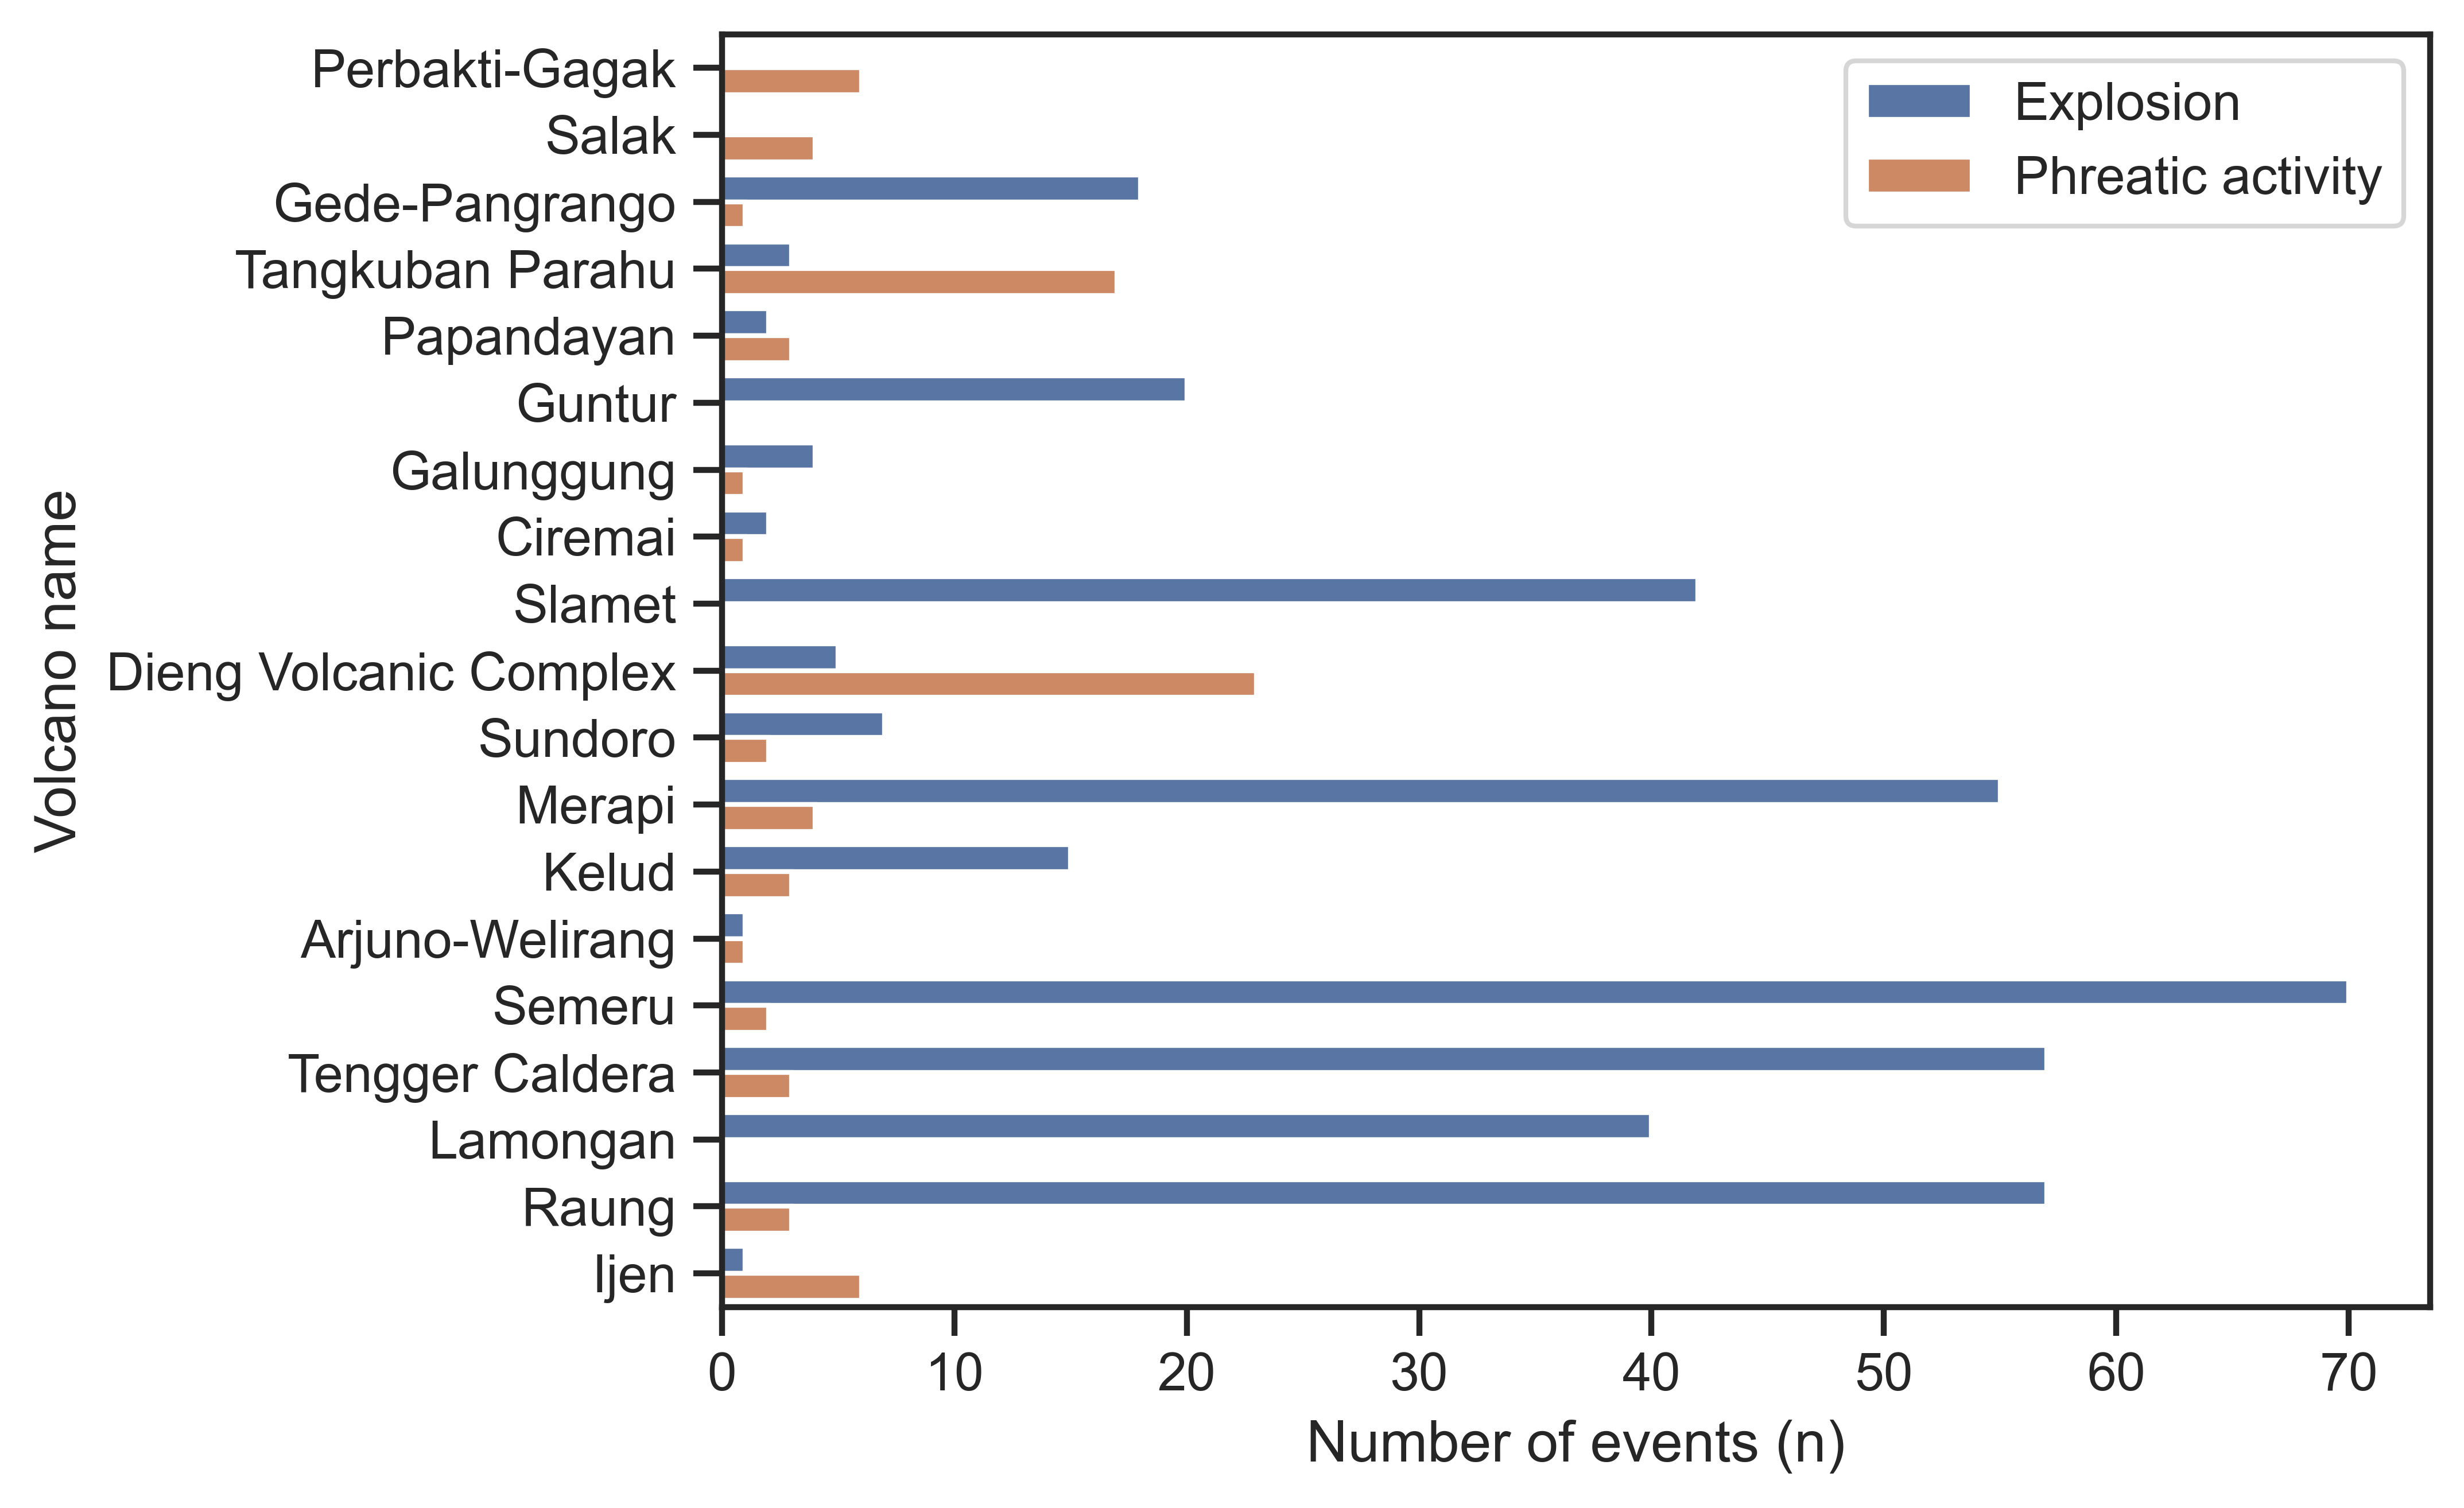

In [32]:
newdata = newdata[['Volcano Name', 'Explosion','Phreatic activity','Repose','VEI']]
newdata

dataacv = newdata[['Volcano Name','Explosion','Phreatic activity']]
data_stacked = pd.melt(dataacv, id_vars='Volcano Name', var_name='Value_Type', value_name='Value')
sns.barplot(data=data_stacked, y='Volcano Name', x='Value',hue='Value_Type')
plt.ylabel('Volcano name')
plt.xlabel('Number of events (n)')
plt.legend(title='')

## Z-score standardization

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Select numeric columns for z-score calculation
numeric_columns = newdata.select_dtypes(include=['float64', 'int']).columns

# Fit and transform the data
z_scores = scaler.fit_transform(newdata[numeric_columns])

# Add the z-scores as new columns in the DataFrame
z_score_columns = [f'{col}_zscore' for col in numeric_columns]
newdata[z_score_columns] = z_scores
zdata = newdata[['Repose_zscore','VEI_zscore','Explosion_zscore','Phreatic activity_zscore']]
zdata

C:\Users\geika\AppData\Local\Temp\ipykernel_5380\3636901860.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdata[z_score_columns] = z_scores
C:\Users\geika\AppData\Local\Temp\ipykernel_5380\3636901860.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdata[z_score_columns] = z_scores
C:\Users\geika\AppData\Local\Temp\ipykernel_5380\3636901860.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,Repose_zscore,VEI_zscore,Explosion_zscore,Phreatic activity_zscore
0,0.442238,-1.347151,-0.894758,0.309989
1,1.046876,0.481125,-0.894758,-0.036469
2,-0.565493,0.481125,-0.127823,-0.556157
3,-0.540299,-1.347151,-0.766936,2.215509
4,1.575934,-1.347151,-0.809543,-0.209698
5,-0.588395,0.481125,-0.042608,-0.729386
6,0.694170,2.309401,-0.724328,-0.556157
7,1.575934,0.481125,-0.809543,-0.556157
8,-0.817425,0.481125,0.894758,-0.729386
9,-0.628476,-1.347151,-0.681721,3.254883


# Clustering

## Elbow method

1 : 1.857771250611451
2 : 1.4734488136363328
3 : 1.0937702729683154
4 : 0.8580216363541163
5 : 0.6136103111907444
6 : 0.5302751942384709
7 : 0.37523538019761205
8 : 0.28373859981010546
9 : 0.24444993737428947


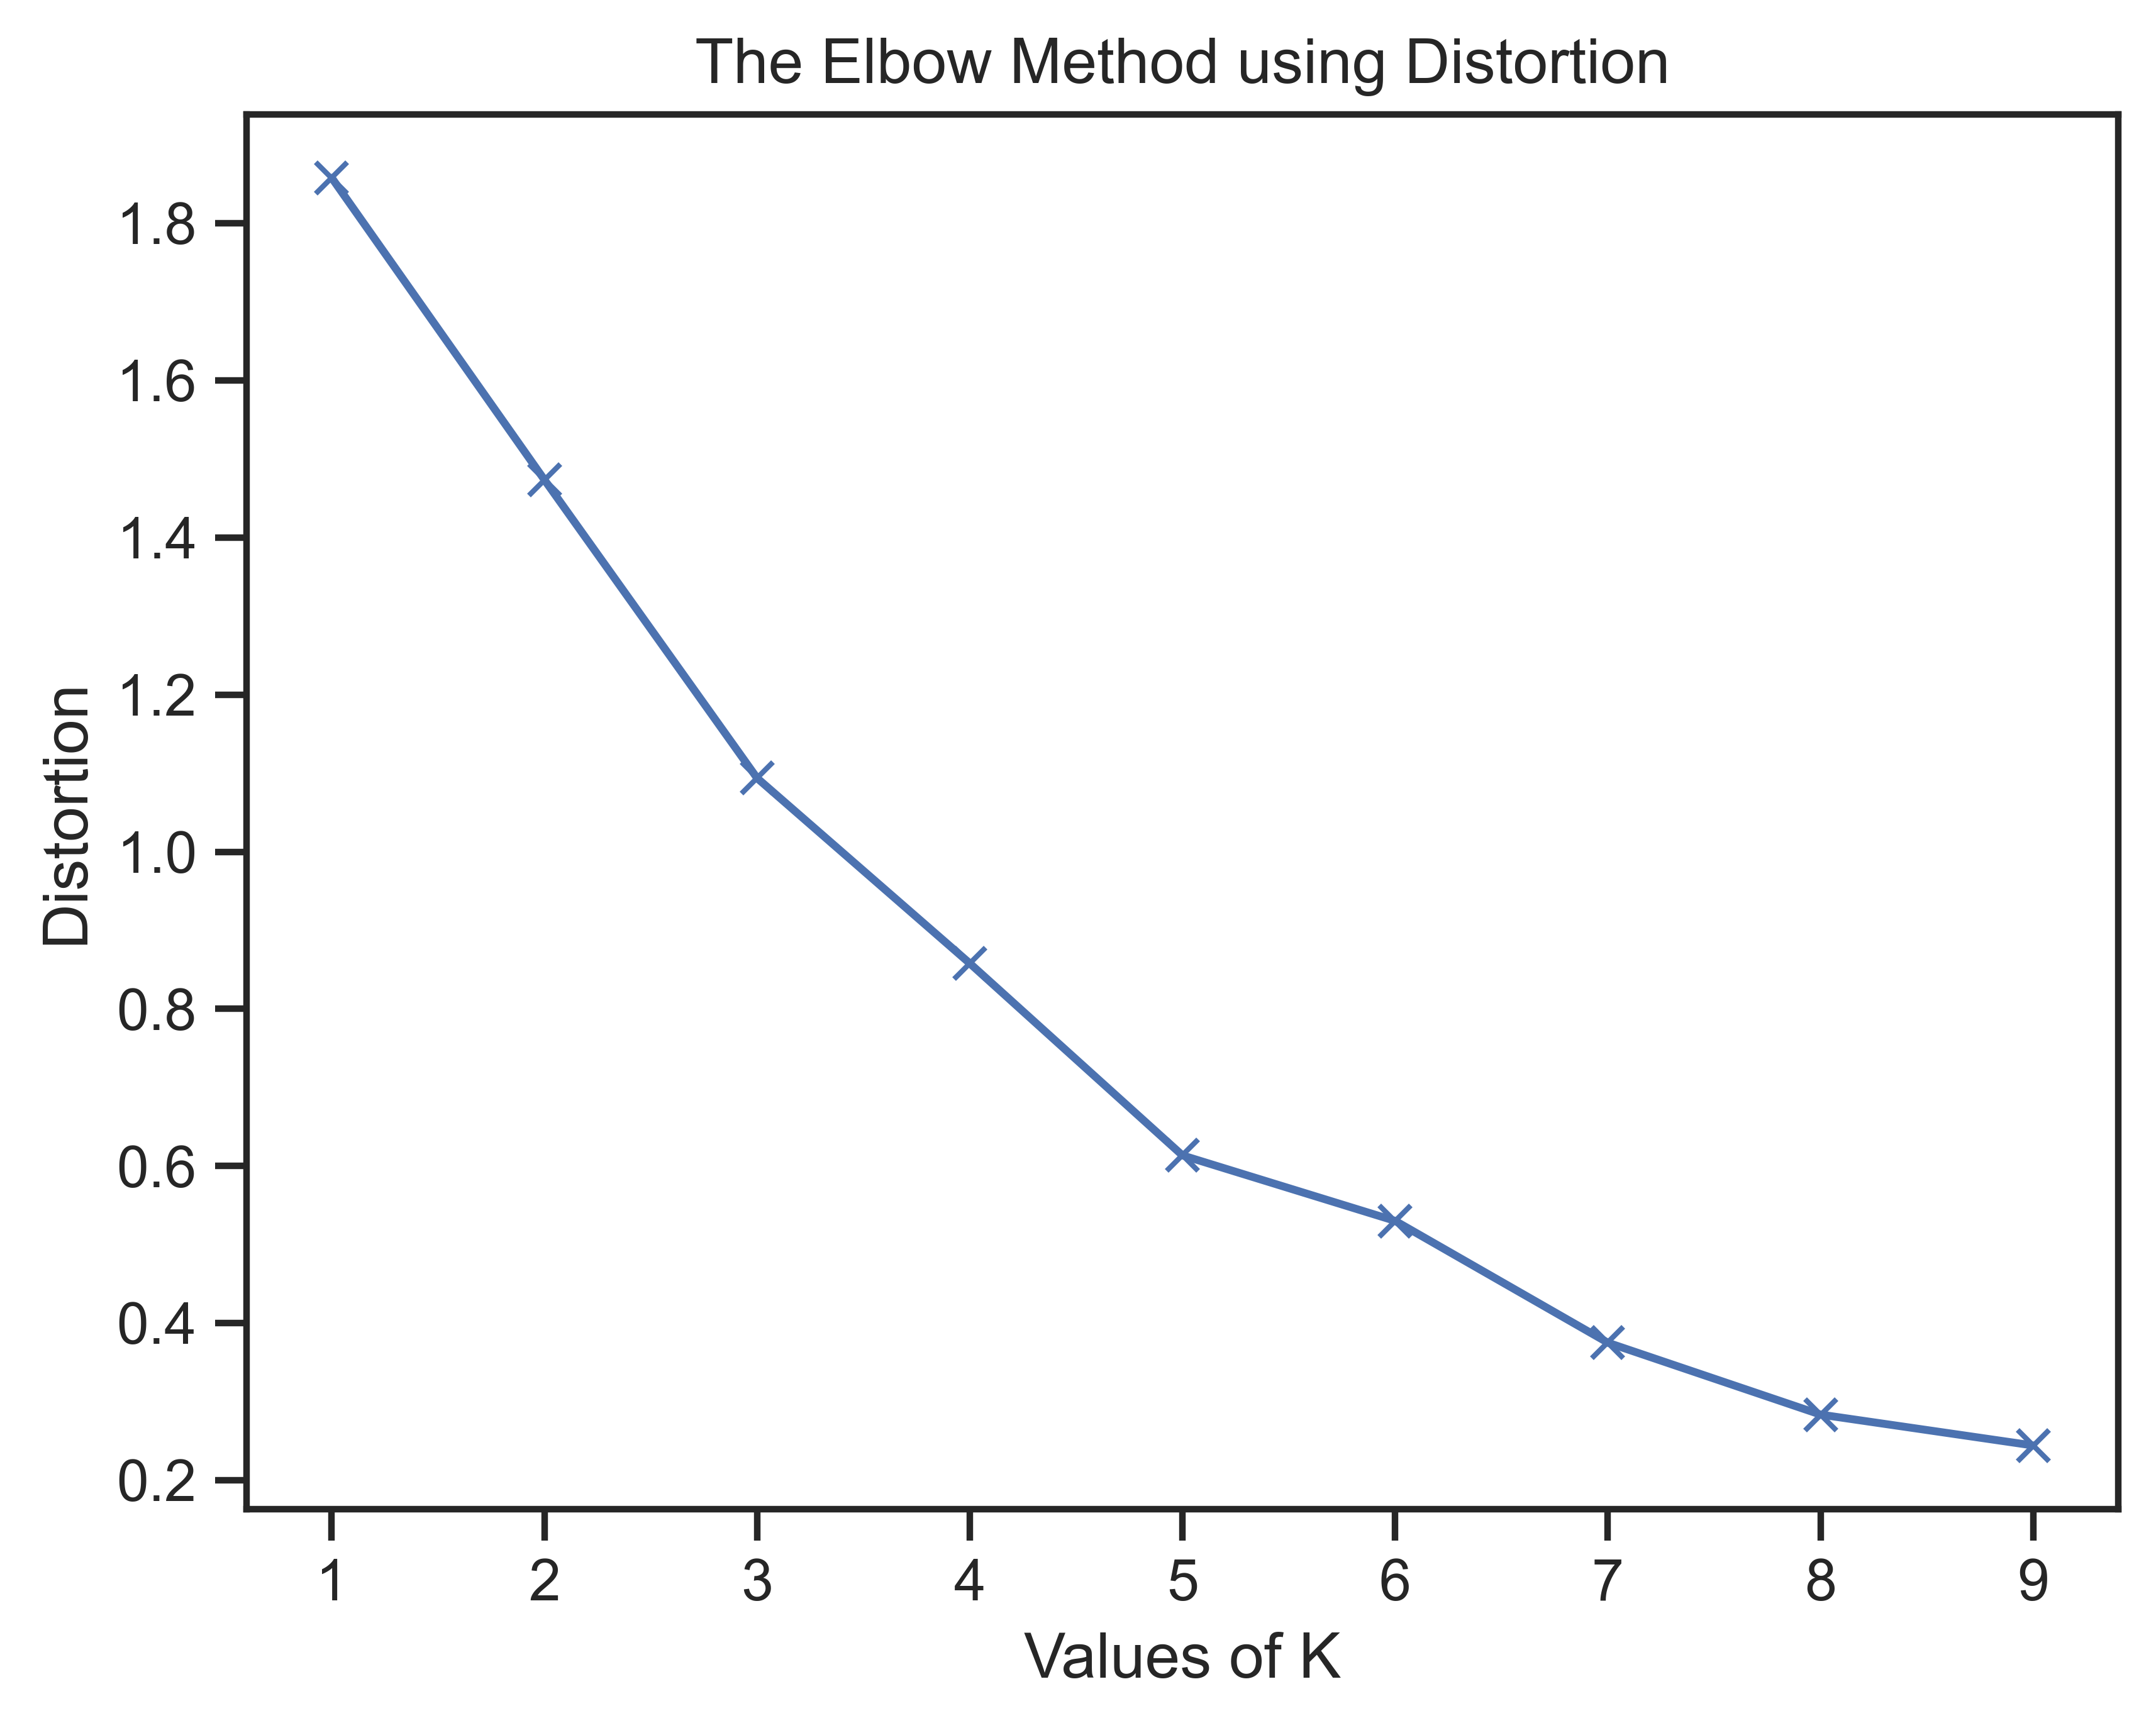

In [34]:
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k, random_state=42).fit(zdata)
    kmeanModel.fit(zdata)
 
    distortions.append(sum(np.min(cdist(zdata, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / zdata.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(zdata, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / zdata.shape[0]
    mapping2[k] = kmeanModel.inertia_

for key, val in mapping1.items():
    print(f'{key} : {val}')

plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [35]:
kmeans = KMeans(n_clusters=5, random_state=42) 
kmeans.fit(zdata)
newdata['Cluster'] = kmeans.labels_
newdata = newdata[['Volcano Name','Explosion','Phreatic activity','Repose','VEI','Cluster']]
mapping = {0: 'E', 1: 'C', 2: 'B', 3: 'A', 4: 'D'}
newdata['Cluster'] = newdata['Cluster'].map(mapping)

centroids = kmeans.cluster_centers_
newdata

C:\Users\geika\AppData\Local\Temp\ipykernel_5380\688578417.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdata['Cluster'] = kmeans.labels_


,Volcano Name,Explosion,Phreatic activity,Repose,VEI,Cluster
0,Perbakti-Gagak,0.0,6.0,384.000000,1.0,D
1,Salak,0.0,4.0,537.600000,2.0,E
2,Gede-Pangrango,18.0,1.0,128.000000,2.0,C
3,Tangkuban Parahu,3.0,17.0,134.400000,1.0,B
4,Papandayan,2.0,3.0,672.000000,1.0,D
5,Guntur,20.0,0.0,122.181818,2.0,C
6,Galunggung,4.0,1.0,448.000000,3.0,E
7,Ciremai,2.0,1.0,672.000000,2.0,E
8,Slamet,42.0,0.0,64.000000,2.0,A
9,Dieng Volcanic Complex,5.0,23.0,112.000000,1.0,B


# Pairplot

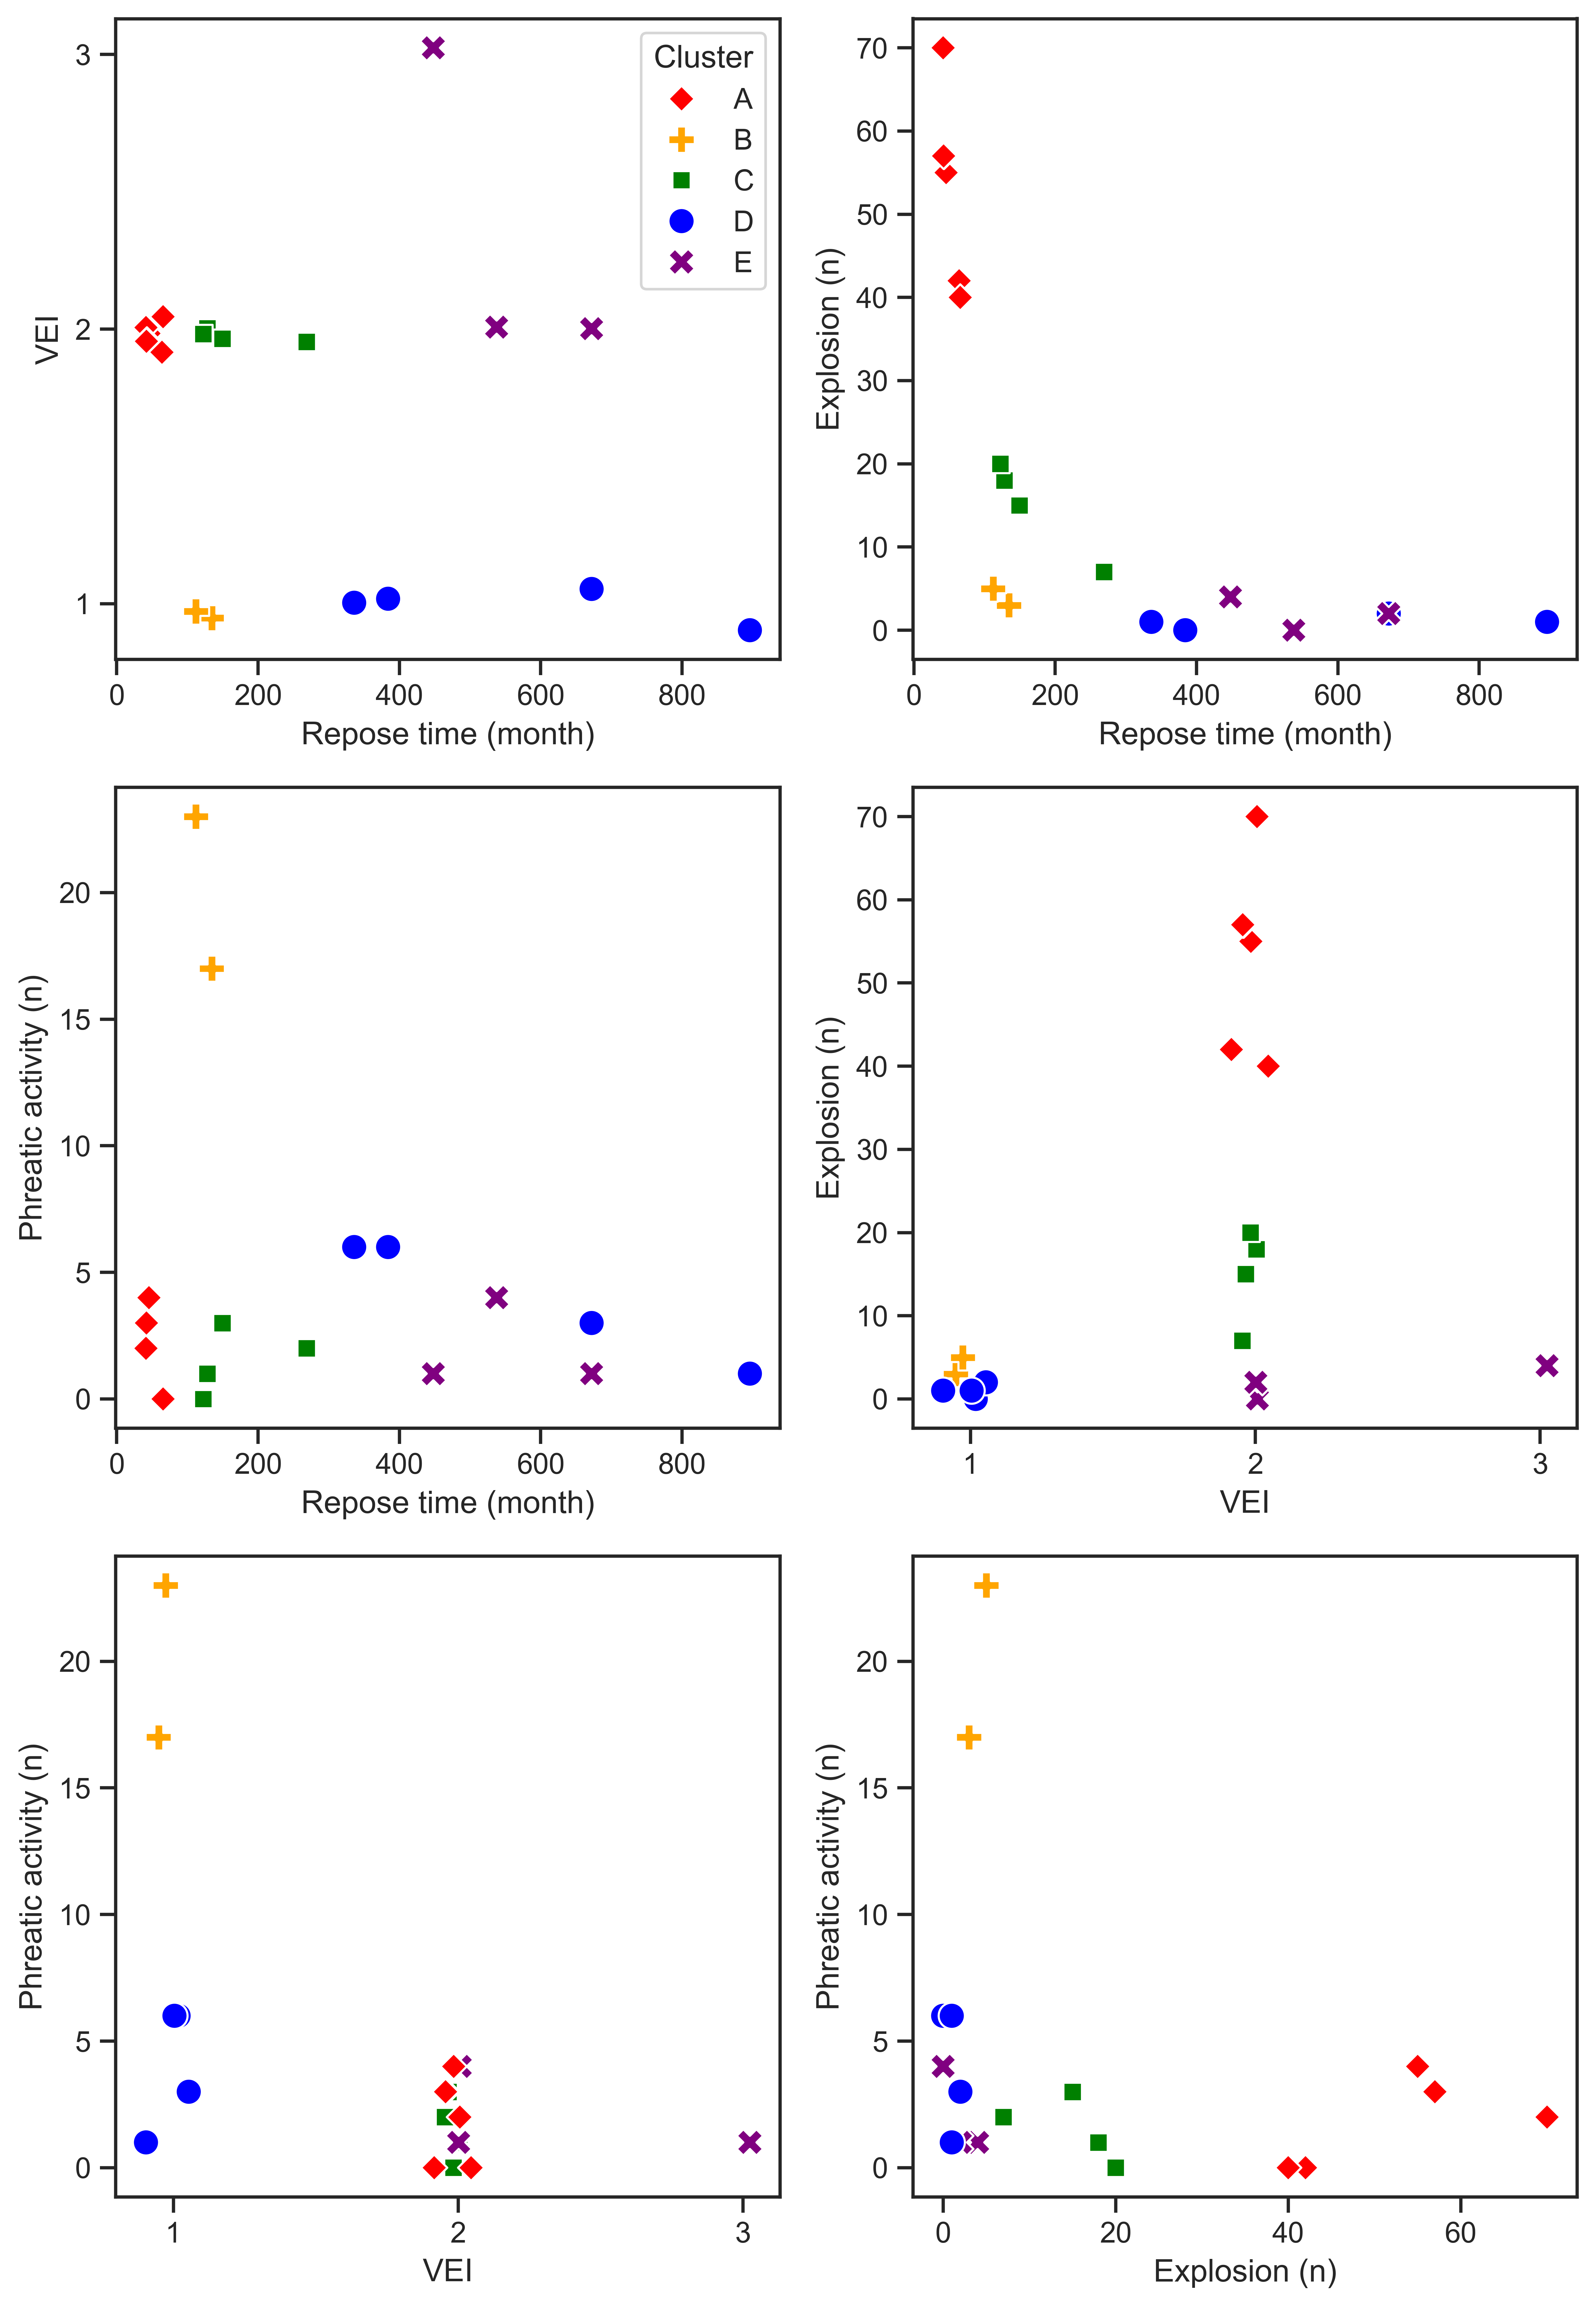

In [36]:
import seaborn as sns

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(10, 15))
hue_order = ['A','B','C','D','E']
custom_palette = {
    'A':'red',
    'B':'orange',
    'C':'green',
    'D':'blue',
    'E':'purple'
}

newdata['VEI_jittered'] = newdata['VEI'] + np.random.normal(0, 0.04, size=len(newdata))
sns.scatterplot(data=newdata, x='Repose',y='VEI_jittered',ax=axs[0,0],hue='Cluster',style='Cluster',palette=custom_palette, hue_order=hue_order,s=100,edgecolor='white')
sns.scatterplot(data=newdata, x='Repose',y='Explosion',ax=axs[0,1],hue='Cluster',style='Cluster',palette=custom_palette, hue_order=hue_order,s=100,edgecolor='white',legend=False)
sns.scatterplot(data=newdata, x='Repose',y='Phreatic activity',ax=axs[1,0],hue='Cluster',style='Cluster',palette=custom_palette, hue_order=hue_order,s=100,edgecolor='white',legend=False)
sns.scatterplot(data=newdata, x='VEI_jittered',y='Explosion',ax=axs[1,1],hue='Cluster',style='Cluster',palette=custom_palette, hue_order=hue_order,s=100,edgecolor='white',legend=False)
sns.scatterplot(data=newdata, x='VEI_jittered',y='Phreatic activity',ax=axs[2,0],hue='Cluster',style='Cluster',palette=custom_palette, hue_order=hue_order,s=100,edgecolor='white',legend=False)
sns.scatterplot(data=newdata, x='Explosion',y='Phreatic activity',ax=axs[2,1],hue='Cluster',style='Cluster',palette=custom_palette, hue_order=hue_order,s=100,edgecolor='white',legend=False)

axs[0,0].set_xlabel('Repose time (month)')
axs[0,0].set_ylabel('VEI')
axs[0,1].set_xlabel('Repose time (month)')
axs[0,1].set_ylabel('Explosion (n)')
axs[1,0].set_xlabel('Repose time (month)')
axs[1,0].set_ylabel('Phreatic activity (n)')
axs[1,1].set_xlabel('VEI')
axs[1,1].set_ylabel('Explosion (n)')
axs[2,0].set_xlabel('VEI')
axs[2,0].set_ylabel('Phreatic activity (n)')
axs[2,1].set_xlabel('Explosion (n)')
axs[2,1].set_ylabel('Phreatic activity (n)')

axs[0,0].set_yticks(range(1,4,1))
axs[1,1].set_xticks(range(1,4,1))
axs[2,0].set_xticks(range(1,4,1))

In [37]:
cldata = newdata.sort_values(by='Cluster',ascending=True)
cldata

,Volcano Name,Explosion,Phreatic activity,Repose,VEI,Cluster,VEI_jittered
16,Lamongan,40.0,0.0,65.560976,2.0,A,2.045176
15,Tengger Caldera,57.0,3.0,42.666667,2.0,A,1.959085
14,Semeru,70.0,2.0,41.353846,2.0,A,2.005738
8,Slamet,42.0,0.0,64.000000,2.0,A,1.915729
17,Raung,57.0,3.0,42.000000,2.0,A,1.955547
11,Merapi,55.0,4.0,45.559322,2.0,A,1.984120
9,Dieng Volcanic Complex,5.0,23.0,112.000000,1.0,B,0.972511
3,Tangkuban Parahu,3.0,17.0,134.400000,1.0,B,0.947896
2,Gede-Pangrango,18.0,1.0,128.000000,2.0,C,2.003211
5,Guntur,20.0,0.0,122.181818,2.0,C,1.982704
